In [1]:
#Import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#Reading and displaying file
data = pd.read_csv('../model/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Extracting Car Company from the CarName as per direction in Problem 

data['CarName'] = data['CarName'].str.split(' ',expand=True)

#Unique Car Company
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Renaming typo in the car names
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [6]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

data['symboling'] = data['symboling'].astype(str)

In [7]:
#Binning the Car Companies based on avg prices of each car Company.

data['price'] = data['price'].astype('int')
data_temp = data.copy()
t = data_temp.groupby(['CarName'])['price'].mean()
data_temp = data_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Cheap_Cars','Medium_Range','TopNotch_Cars']
data['Cars_Category'] = pd.cut(data_temp['price_y'],bins,right=False,labels=label)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


Text(0, 0.5, 'Frequency')

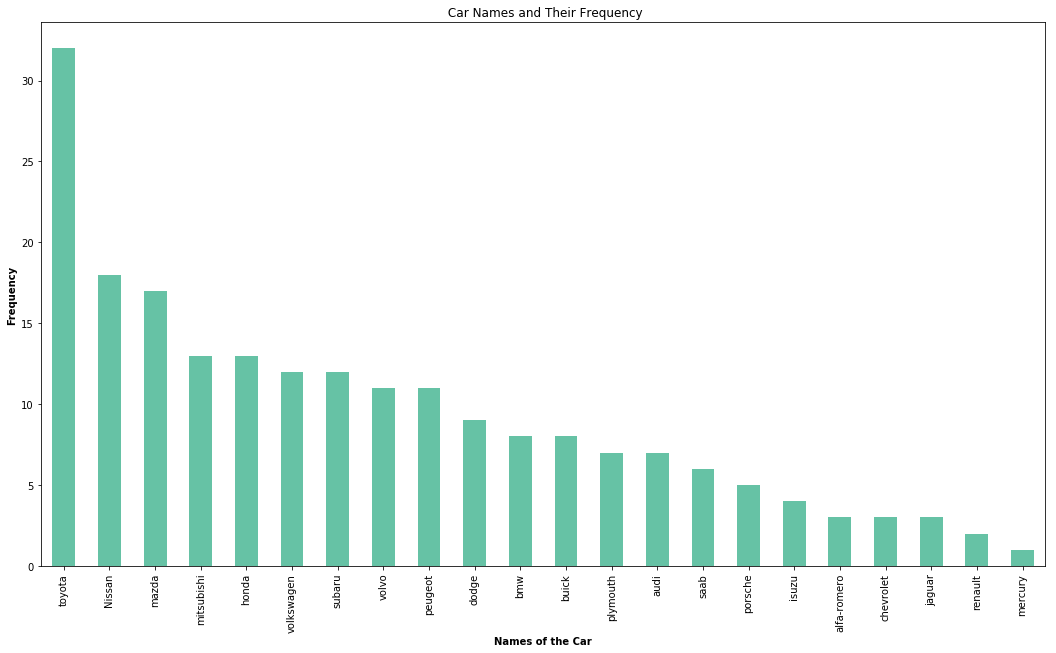

In [8]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [18,10]
ax=data['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set2')
ax.title.set_text(' Car Names and Their Frequency')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Frequency",fontweight = 'bold')

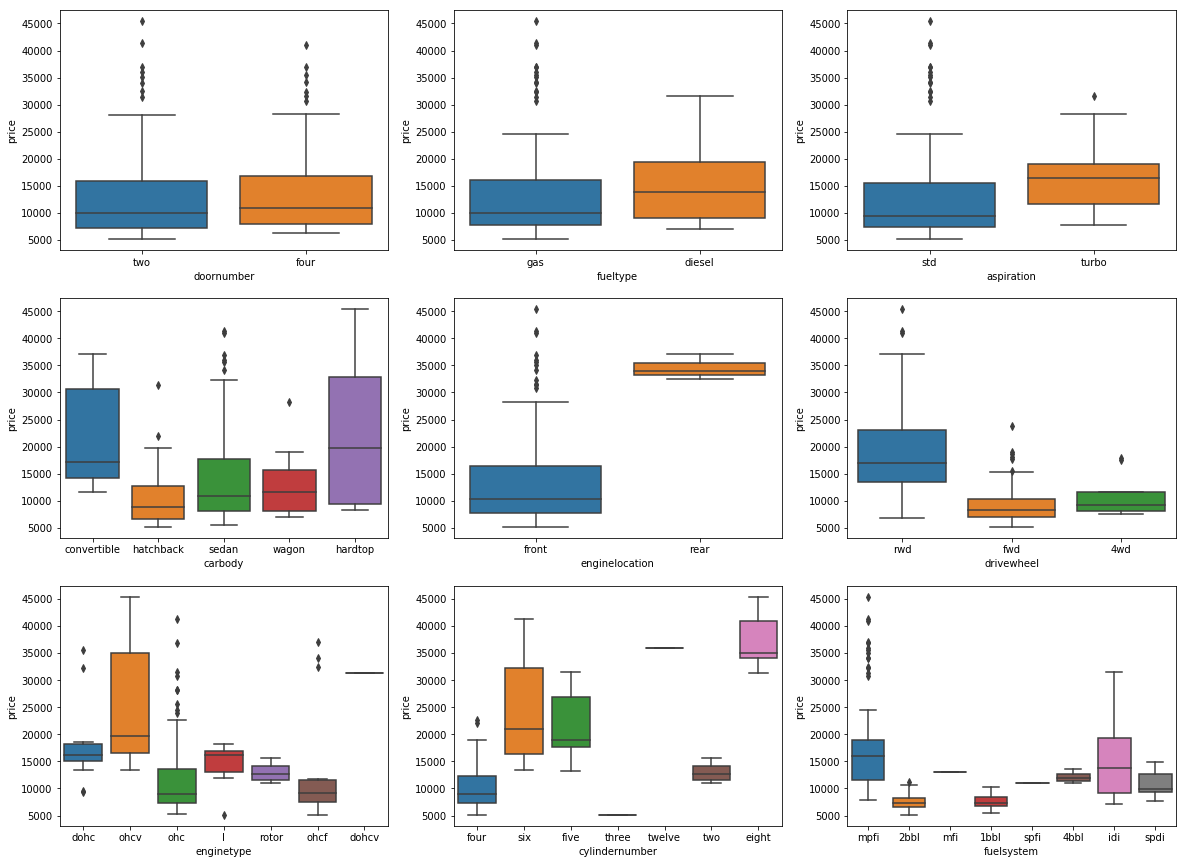

In [9]:
#Relationship of other features influencing Price
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.show()

<Figure size 1440x432 with 0 Axes>

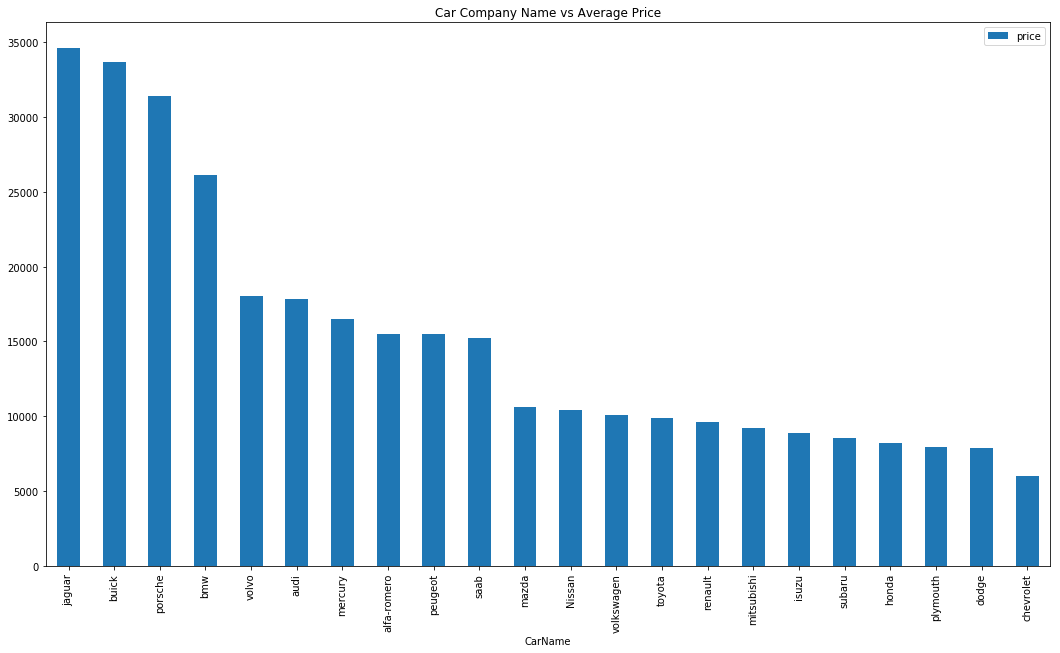

In [10]:
#Average Price of Cars
plt.figure(figsize=(20, 6))

data_avgPrice = pd.DataFrame(data.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
data_avgPrice.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

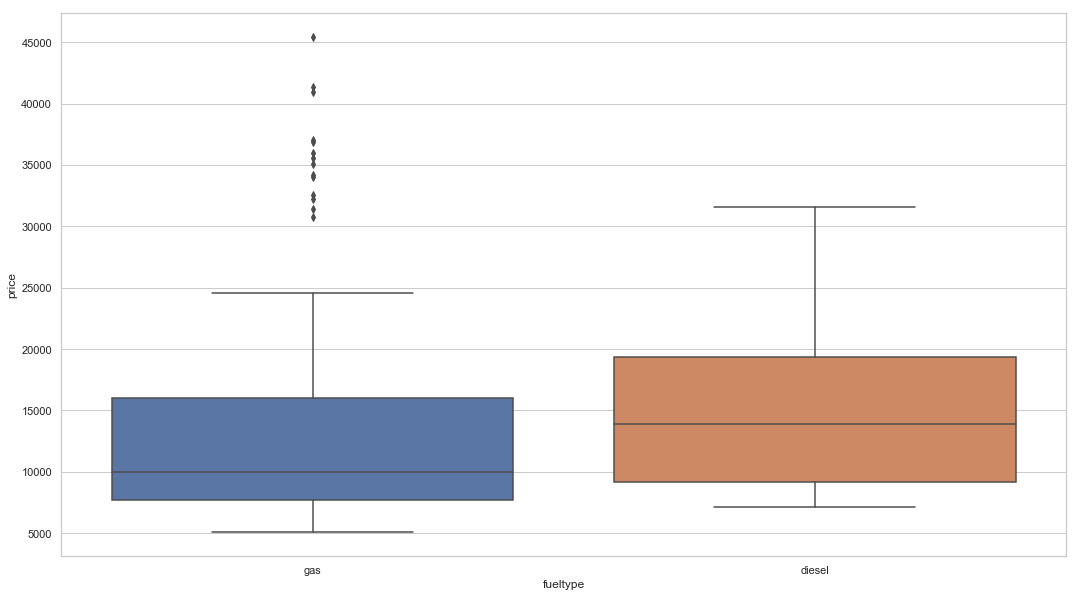

In [11]:
sns.set(style='whitegrid')
ax = sns.boxplot(x=data['fueltype'], y =data['price'])

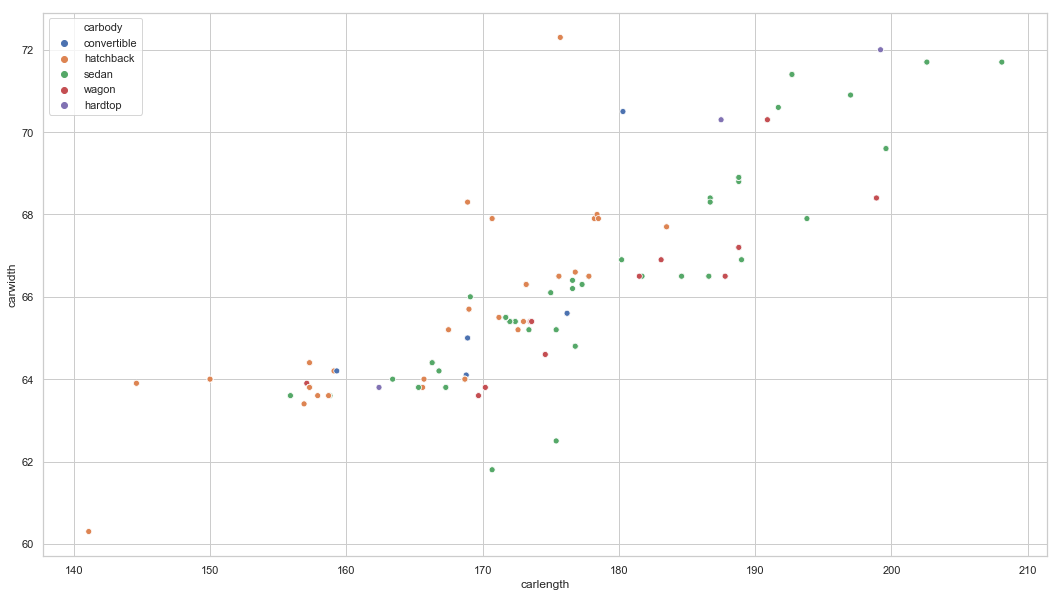

In [12]:
sns.set(style='whitegrid')
ax = sns.scatterplot( x=data['carlength'],
                     y =data['carwidth'],
                    hue = data['carbody'],
                    legend = 'full')

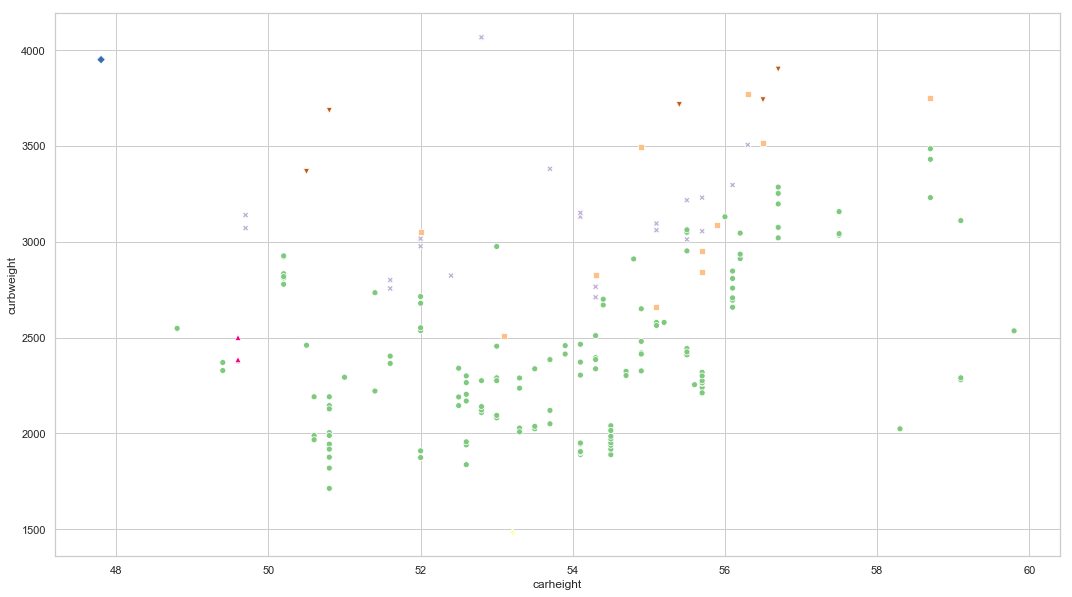

In [14]:
sns.set(style='whitegrid')
ax = sns.scatterplot( x=data['carheight'],
                     y =data['curbweight'],
                    hue = data['cylindernumber'],
                     style = data['cylindernumber'],
                     palette = 'Accent',
                    legend =False)


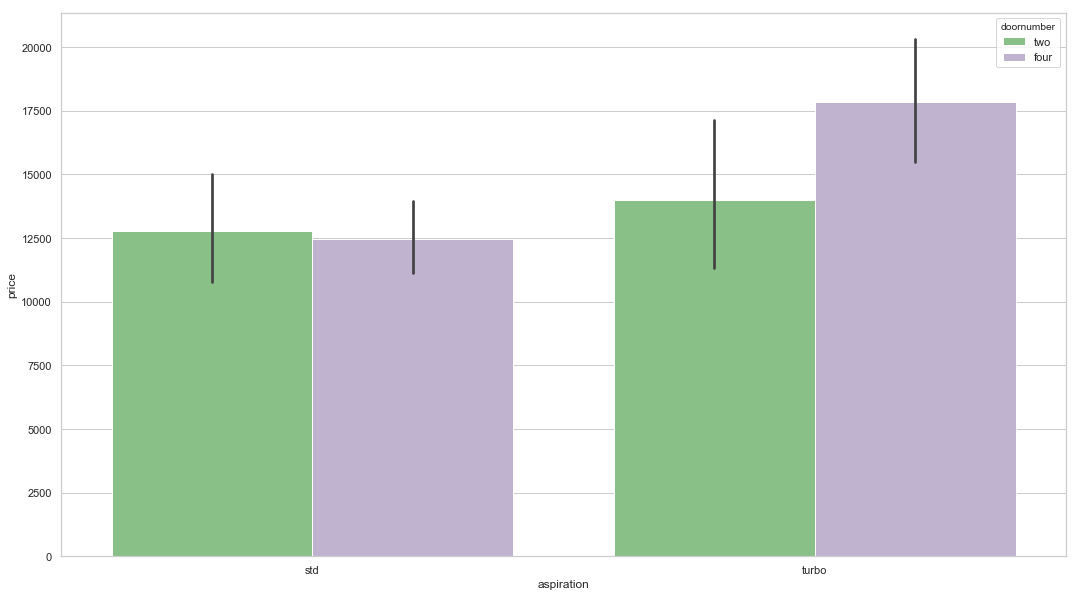

In [15]:
sns.set(style='whitegrid', color_codes= True)
ax = sns.barplot( x=data['aspiration'],
                     y =data['price'],
                    hue = data['doornumber'],
                     palette = 'Accent')

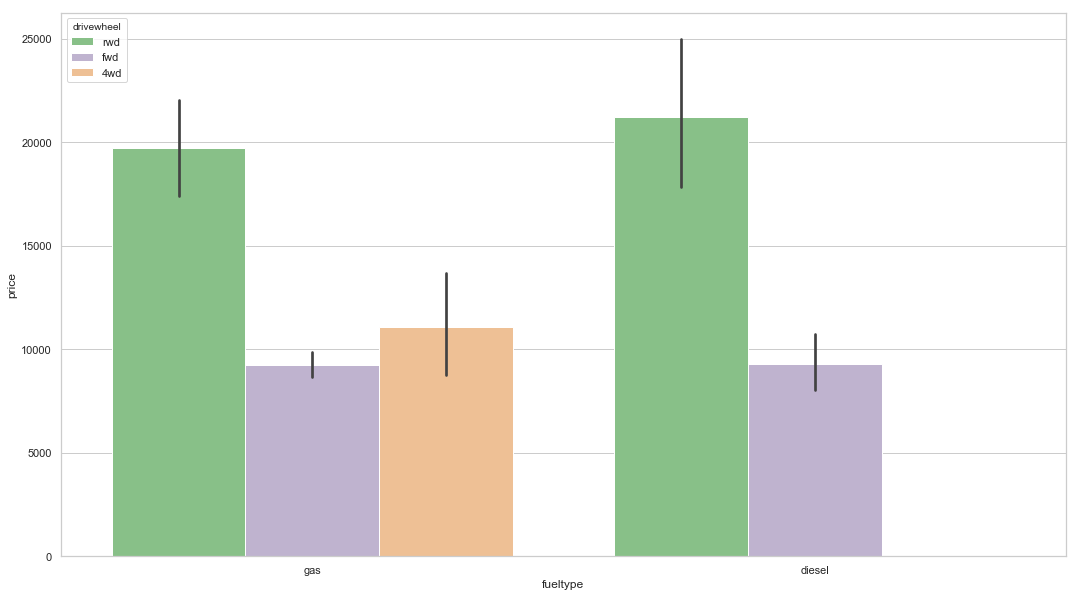

In [16]:
ax = sns.barplot( x=data['fueltype'],
                     y =data['price'],
                    hue = data['drivewheel'],
                     palette = 'Accent')

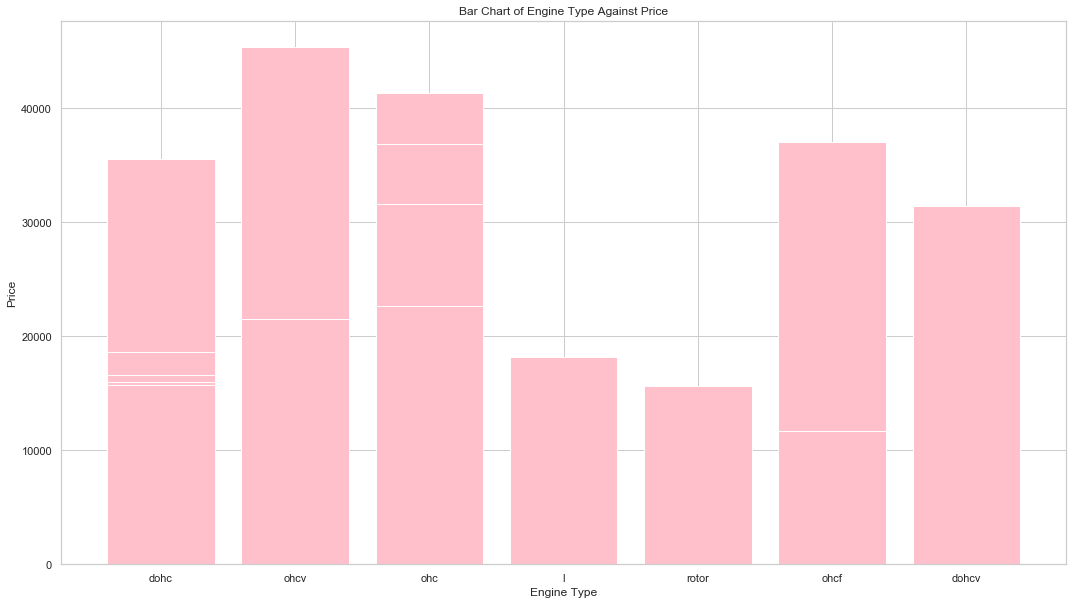

In [17]:
plt.bar(data.enginetype, data.price, color = 'pink', align ='center', bottom = None)
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Bar Chart of Engine Type Against Price')
plt.show()

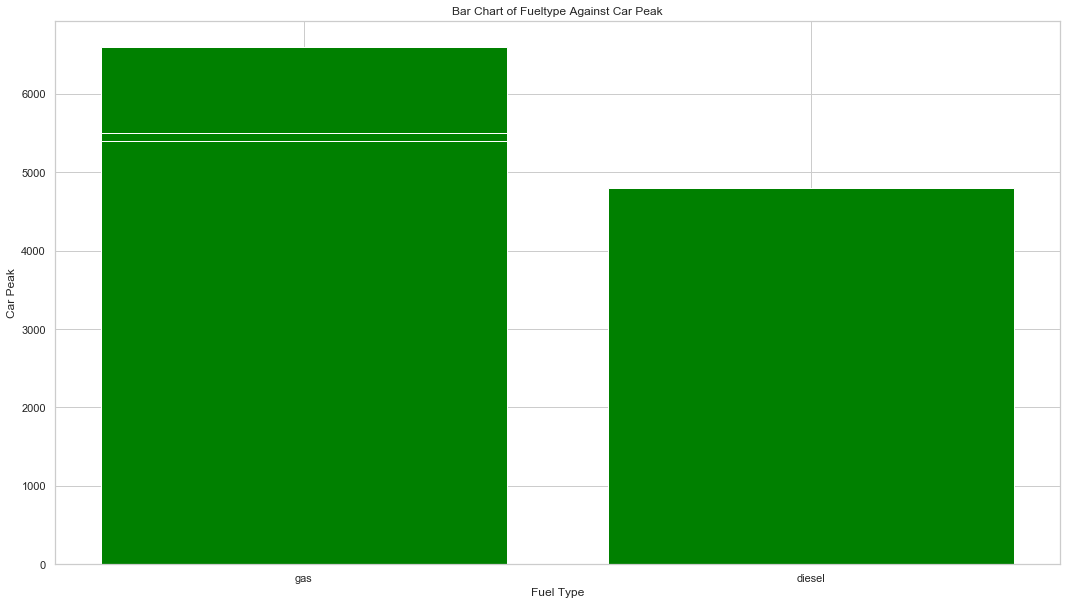

In [18]:
plt.bar(data.fueltype, data.peakrpm, align ='center', bottom = None, color = 'green')
plt.xlabel('Fuel Type')
plt.ylabel('Car Peak')
plt.title('Bar Chart of Fueltype Against Car Peak')
plt.show()

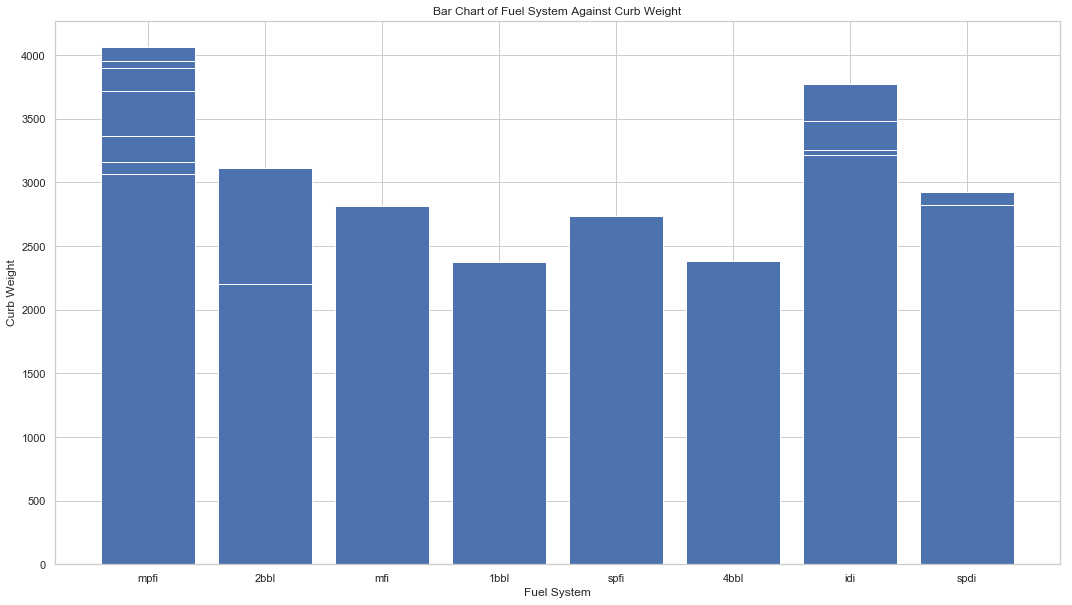

In [19]:
plt.bar(data.fuelsystem, data.curbweight, align ='center', bottom = None)
plt.xlabel('Fuel System')
plt.ylabel('Curb Weight')
plt.title('Bar Chart of Fuel System Against Curb Weight')
plt.show()

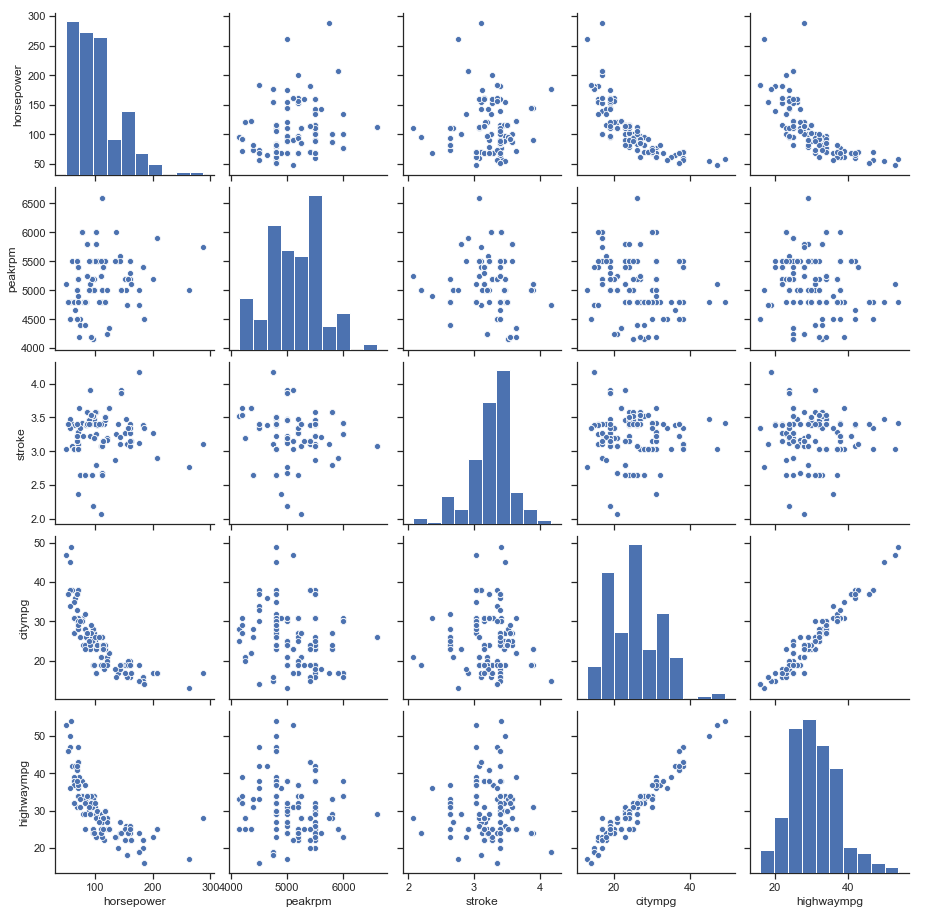

In [20]:
sns.set(style= 'ticks', color_codes = True)
g = sns.pairplot(data, vars = ['horsepower', 'peakrpm', 'stroke', 'citympg', 'highwaympg'])

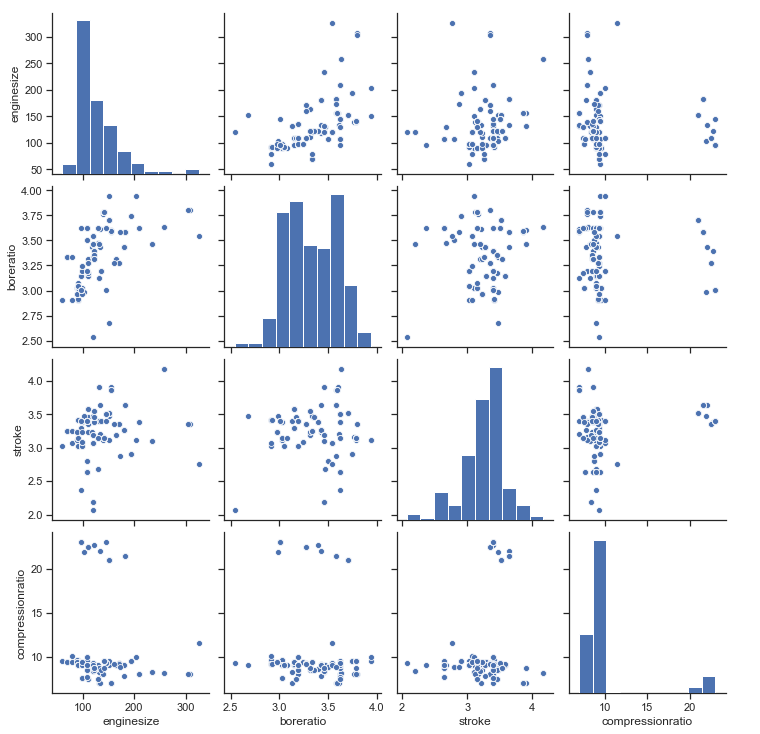

In [21]:
sns.set(style= 'ticks', color_codes = True)
g = sns.pairplot(data,
                 vars = ['enginesize',
                         'boreratio', 
                         'stroke',
                         'compressionratio'])

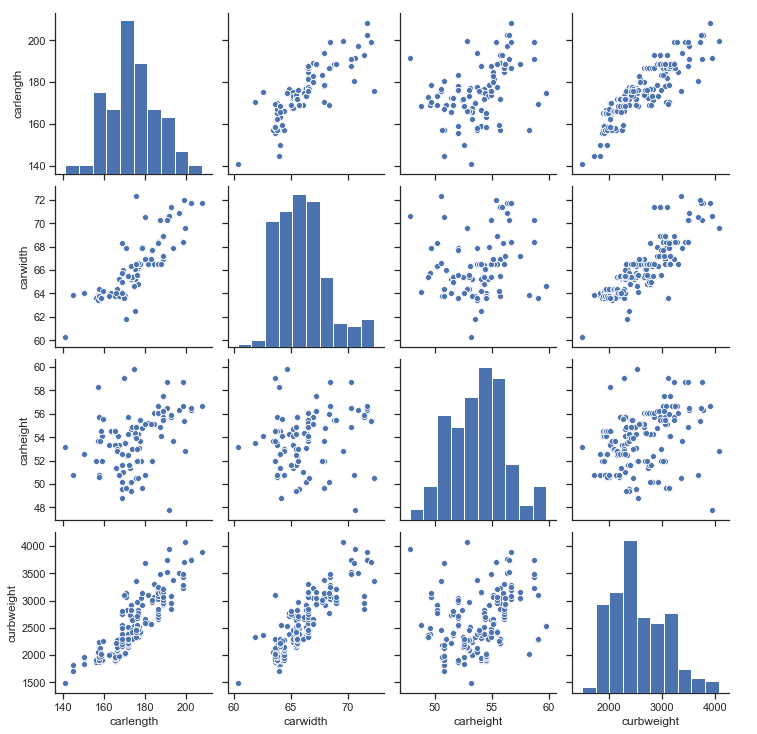

In [22]:
sns.set(style= 'ticks', color_codes = True)
g = sns.pairplot(data,
                 vars = ['carlength',
                         'carwidth', 
                         'carheight',
                         'curbweight'])

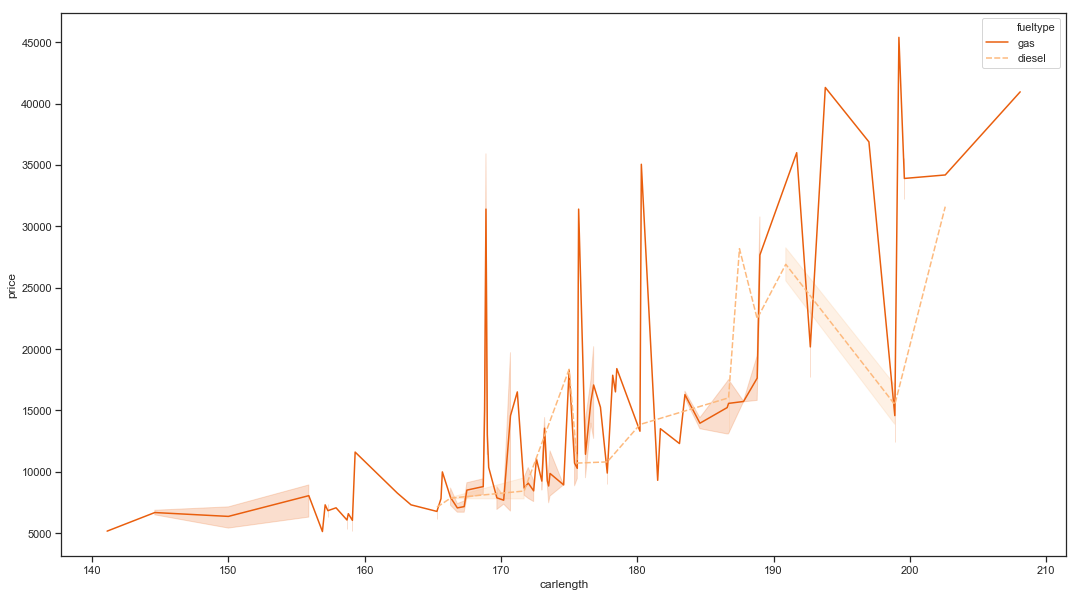

In [23]:
g = sns.lineplot(x = 'carlength', y = 'price',
                 hue = 'fueltype',style = 'fueltype',
                 palette= 'Oranges_r', data=data)

In [24]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [25]:
data = data[sig_col]

In [26]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [27]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(data[sig_cat_col])
dummies.shape

(205, 29)

In [28]:
dummies = pd.get_dummies(data[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [29]:
# Add the results to the original dataframe

data = pd.concat([data, dummies], axis = 1)

In [30]:
# Drop the original cat variables as dummies are already created

data.drop( sig_cat_col, axis = 1, inplace = True)
data.shape

(205, 32)

In [31]:
data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,0,0,1,0,0,0,1,0,0,0
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2,...,1,0,0,0,0,1,0,0,0,0
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,1,0,0,0,1,0,0,0,0,0


In [32]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 80/20 ratio

from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
y_train = data_train.pop('price')
X_train = data_train

y_test = data_test.pop('price')
X_test = data_test

In [34]:
#fitting our training data in the model
from sklearn import linear_model

lm = linear_model.LinearRegression()

model    = lm.fit(X_train, y_train) #fitting our training data in the model
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [35]:
predictions = lm.predict(X_test)

Score:  0.9256490741138673


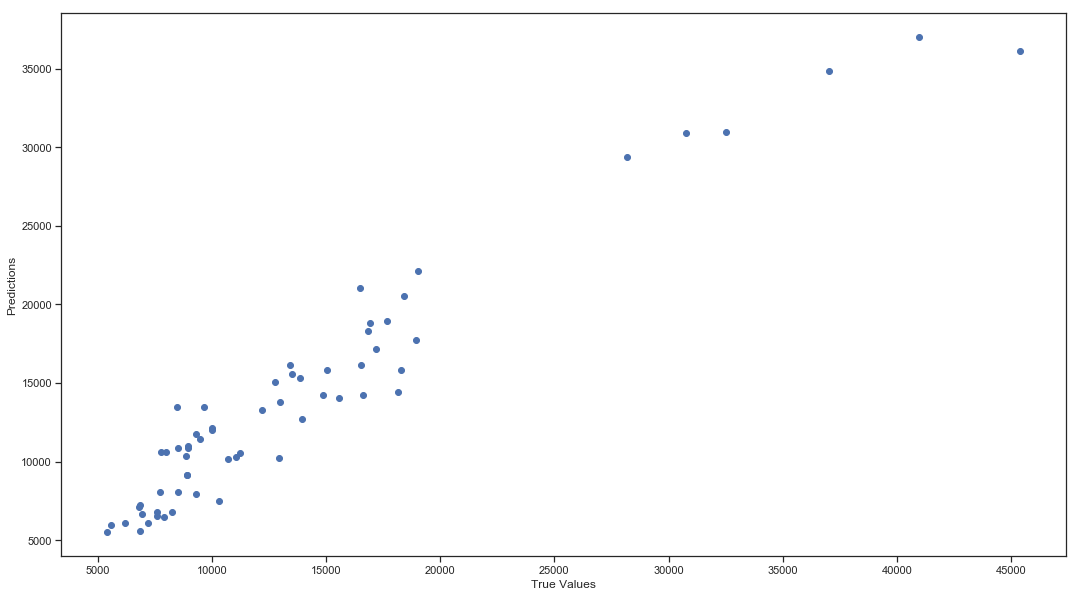

In [36]:
#Plot graph and determine score of prediction
plt.scatter(y_test,predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Score =  model.score(X_test,y_test)
print('Score: ',Score)

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error 
# building a base model
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [42]:
# scoring using test data
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.8779991287302312
